In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,mean_squared_error ,r2_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
df =pd.read_csv("House.csv")
df.columns= ['price','lattitude','longitude','bedrooms','bathrooms','area']

latitude=df.iloc[:,1]
longitude=df.iloc[:,2]
bedrooms = df.iloc[:,3] ## bedrooms
bathrooms = df.iloc[:,4] ## bathrooms
area = df.iloc[:,5] ## area m2
price= np.array(df.iloc[:,0])
features= np.column_stack((latitude,longitude,bedrooms,bathrooms,area))


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

109828475910.8489
82843771382.87915
k : 1 MSE : 174730733424.18658 std 111482542471.6343
k : 2 MSE : 145889569112.43982 std 98734713168.5223
k : 3 MSE : 127325085989.36801 std 84692618492.7454
k : 4 MSE : 123465398380.8332 std 82843771382.87915
k : 5 MSE : 114952484929.54854 std 84977408975.31601
k : 6 MSE : 109828475910.8489 std 84027699518.25743
k : 7 MSE : 110914740497.34859 std 88869686551.27605
k : 8 MSE : 111764685169.33614 std 89116953158.15434
k : 9 MSE : 114037555092.4707 std 92264418689.80309
k : 10 MSE : 115711524325.45544 std 94337358539.33759
k : 11 MSE : 115980496786.9075 std 95645719614.21382
k : 12 MSE : 114713541301.39624 std 95698727608.10829
k : 13 MSE : 113766810776.0542 std 96721866600.83911
k : 14 MSE : 112835734011.57803 std 96041684301.607
k : 15 MSE : 114114621593.81865 std 98292382078.59018
k : 16 MSE : 114691801741.48715 std 99505020260.80696
k : 17 MSE : 114896860373.33139 std 99858196560.18182
k : 18 MSE : 115799512541.38571 std 99996874707.27415
k : 19 MSE

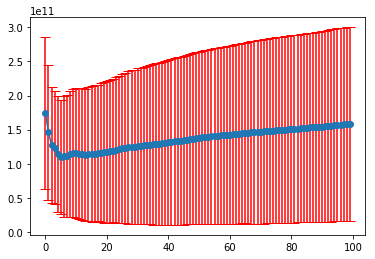

In [5]:
meanError=[];stdError=[]
## FOR WEIGHTS = UNIFORM 

for k in range(100):
    k=k+1
    model=KNeighborsRegressor(n_neighbors=k,weights='uniform')
    kf=KFold(n_splits=5)
    temp=[]
    
    for train,test in kf.split(features):
        model.fit(features[train],price[train])
        ypred=model.predict(features[test])
        
        temp.append(mean_squared_error(price[test],ypred))
    meanError.append(np.array(temp).mean())
    stdError.append(np.array(temp).std())
    
plt.errorbar(range(100),meanError,yerr=stdError,fmt="-o",ecolor="r",capsize=5)
print(min(meanError))## k : 41 MSE : 91371866501.27591 std 81249346825.26187
print(min(stdError)) ##k : 6 MSE : 105122780233.45108 std 76221252228.10388
##min is - 
for k in range(100):
    
    k=k+1
    index=k-1;
    print("k :",k,"MSE :",meanError[index],"std",stdError[index])
    
    ## for k = 6 
    ##k : 6 MSE : 109828475910.8489 std 84027699518.25743
        

109465662073.31052
26693062749.089546
num folds: 2  MSE : 109742943502.84314 std 26693062749.089546
num folds: 3  MSE : 110958717731.25635 std 48712748349.53729
num folds: 5  MSE : 109828475910.8489 std 84027699518.25743
num folds: 7 MSE : 114207865027.00166 std 114058628821.03963
num folds: 10  MSE : 113209289624.89706 std 103660887972.48627
num folds: 25  MSE : 109465662073.31052 std 139400973463.5541


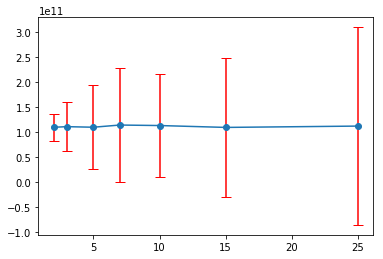

In [17]:
meanError=[];stdError=[]
numFolds =[2,3,5,7,10,15,25]

for k in numFolds:
    model=KNeighborsRegressor(n_neighbors=6,weights='uniform')
    kf=KFold(n_splits=k)
    temp=[]
    
    for train,test in kf.split(features):
        model.fit(features[train],price[train])
        ypred=model.predict(features[test])
        
        temp.append(mean_squared_error(price[test],ypred))
    meanError.append(np.array(temp).mean())
    stdError.append(np.array(temp).std())
    
print(min(meanError))
print(min(stdError))
plt.errorbar(numFolds,meanError,yerr=stdError,fmt="-o",ecolor="r",capsize=5)

print("num folds: 2  MSE :",meanError[0],"std",stdError[0])
print("num folds: 3  MSE :",meanError[1],"std",stdError[1])
print("num folds: 5  MSE :",meanError[2],"std",stdError[2])
print("num folds: 7 MSE :",meanError[3],"std",stdError[3])
print("num folds: 10  MSE :",meanError[4],"std",stdError[4])
print("num folds: 25  MSE :",meanError[5],"std",stdError[5])



### minimum for number of folds is at a num folds = 2
## training with a small value for

In [ ]:
## it is evident selecting a small value for the number of folds is optimal as the standard error increases significantly with increasing 
 ## number of folds 
        
        

91371866501.27591
76221252228.10388
k : 1 MSE : 174730733424.18658 std 111482542471.6343
k : 2 MSE : 145710599772.89786 std 97139819426.8169
k : 3 MSE : 123362451797.97908 std 81353061591.94652
k : 4 MSE : 118336262015.04086 std 77570733583.5074
k : 5 MSE : 110931526418.93697 std 77126755256.24675
k : 6 MSE : 105122780233.45108 std 76221252228.10388
k : 7 MSE : 104130638358.99536 std 77863387354.5228
k : 8 MSE : 102861432204.0638 std 77190222421.75351
k : 9 MSE : 101717614217.97684 std 77531293030.91553
k : 10 MSE : 103228470349.9625 std 78327726064.43895
k : 11 MSE : 102426119256.83202 std 79156824961.87065
k : 12 MSE : 100807110131.89578 std 79125962331.25955
k : 13 MSE : 98945048318.48099 std 79149343184.9444
k : 14 MSE : 97805122513.34169 std 78546019769.7042
k : 15 MSE : 97272711185.10135 std 78984402127.65424
k : 16 MSE : 97022251967.71674 std 79043178370.89647
k : 17 MSE : 96408983979.18668 std 78927656113.52316
k : 18 MSE : 95903247082.45015 std 78619434896.94055
k : 19 MSE : 9

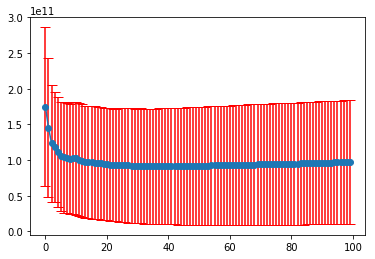

In [18]:
## closer inspection within range 
## WEIGHTS ARE DISTANCE 

meanError=[];stdError=[];yPredicted=[];y=[];
kRange = [1,3,5,7,10,15,18,20,25,29,31,37,41,44]




for k in range(100):
    k=k+1
    model=KNeighborsRegressor(n_neighbors=k,weights='distance')
    kf=KFold(n_splits=5)
    temp=[]
    
    for train,test in kf.split(features):
        model.fit(features[train],price[train])
        ypred=model.predict(features[test])
        temp.append(mean_squared_error(price[test],ypred))
    meanError.append(np.array(temp).mean())
    stdError.append(np.array(temp).std())
    yPredicted.append(np.array)
    
plt.errorbar(range(100),meanError,yerr=stdError,fmt="-o",ecolor="r",capsize=5)
print(min(meanError))## k : 41 MSE : 91371866501.27591 std 81249346825.26187
print(min(stdError)) ##k : 6 MSE : 105122780233.45108 std 76221252228.10388


for k in range(100):
    k=k+1
    index=k-1;
    print("k :",k,"MSE :",meanError[index],"std",stdError[index])
    



In [ ]:
## k : 41 MSE : 91371866501.27591 std 81249346825.26187

#k : 6 MSE : 105122780233.45108 std 76221252228.10388



87857975067.5677
37127264000.14281
num folds: 2  MSE : 93206321183.47656 std 37127264000.14281
num folds: 3  MSE : 95167517343.19206 std 53042890479.78232
num folds: 5  MSE : 91371866501.27591 std 81249346825.26187
num folds: 7  MSE : 92432755521.57048 std 102075118034.59238
num folds: 10  MSE : 91203086966.61081 std 87527445236.01665
num folds: 15  MSE : 87964072283.69284 std 129018689909.09985
num folds: 25  MSE : 87857975067.5677 std 169500291638.52264


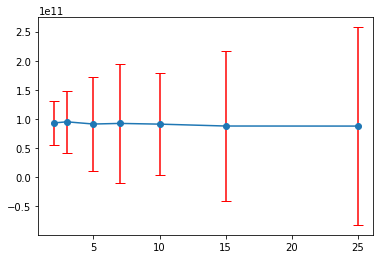

In [20]:
## check optimal k fold

meanError=[];stdError=[]
numFolds =[2,3,5,7,10,15,25]

for k in numFolds:
    model=KNeighborsRegressor(n_neighbors=41,weights='distance')
    kf=KFold(n_splits=k)
    temp=[]
    
    for train,test in kf.split(features):
        model.fit(features[train],price[train])
        ypred=model.predict(features[test])
        
        temp.append(mean_squared_error(price[test],ypred))
    meanError.append(np.array(temp).mean())
    stdError.append(np.array(temp).std())
    
print(min(meanError))
print(min(stdError))
plt.errorbar(numFolds,meanError,yerr=stdError,fmt="-o",ecolor="r",capsize=5)

print("num folds: 2  MSE :",meanError[0],"std",stdError[0])
print("num folds: 3  MSE :",meanError[1],"std",stdError[1])
print("num folds: 5  MSE :",meanError[2],"std",stdError[2])
print("num folds: 7  MSE :",meanError[3],"std",stdError[3])
print("num folds: 10  MSE :",meanError[4],"std",stdError[4])
print("num folds: 15  MSE :",meanError[5],"std",stdError[5])
print("num folds: 25  MSE :",meanError[6],"std",stdError[6])

## evident as the number of k folds increase the standard deviation exponentially increases , thus it is desirable to select a small 
## value for the number of folds 


In [ ]:
## minimum fold of 25 , however this comes with a significant jump in std error 
##  therefore the next lowest with the smallest std error is with a number of  folds of 50 .
## a wide range was selected in order to see the entire range a closer inspection within this range wass then carried out 

### when the distance parameter is used the points are weighted by inverse of their distance , thus the closer points to
##the query will have a greater influence than their neighbours which are further away 


87857975067.5677
137078958656.08624
num folds: 25  MSE : 87857975067.5677 std 169500291638.52264
num folds: 30  MSE : 88529059453.42195 std 137078958656.08624
num folds: 35  MSE : 88587010076.51659 std 149333562661.9583
num folds: 40  MSE : 88635716601.10922 std 157504915386.9952
num folds: 45  MSE : 88609459991.57582 std 167391516439.2245
num folds: 55  MSE : 88674028606.21532 std 183270518467.29718


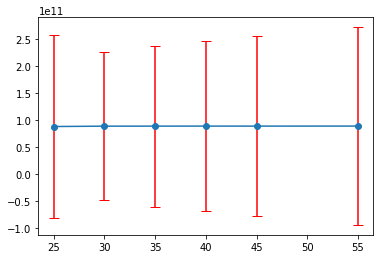

In [21]:
meanError=[];stdError=[]
numFolds =[25,30,35,40,45,55]

for k in numFolds:
    model=KNeighborsRegressor(n_neighbors=41,weights='distance')
    kf=KFold(n_splits=k)
    temp=[]
    
    for train,test in kf.split(features):
        model.fit(features[train],price[train])
        ypred=model.predict(features[test])
        
        temp.append(mean_squared_error(price[test],ypred))
    meanError.append(np.array(temp).mean())
    stdError.append(np.array(temp).std())
    
print(min(meanError))
print(min(stdError))
plt.errorbar(numFolds,meanError,yerr=stdError,fmt="-o",ecolor="r",capsize=5)


print("num folds: 25  MSE :",meanError[0],"std",stdError[0])
print("num folds: 30  MSE :",meanError[1],"std",stdError[1])
print("num folds: 35  MSE :",meanError[2],"std",stdError[2])
print("num folds: 40  MSE :",meanError[3],"std",stdError[3])
print("num folds: 45  MSE :",meanError[4],"std",stdError[4])
print("num folds: 55  MSE :",meanError[5],"std",stdError[5])

## ERROR SO HIGH :(())


In [50]:
## trying to adjust other parameters 

### BEST MODEL SO FAR 
## Weight is distance , number of folds =2 , number of neighbours = 41 

actualY = []
predictedY =[]
featuresCollected=[]
kf = KFold(n_splits=2)

for train,test in kf.split(features):
    modelKnn = KNeighborsRegressor(n_neighbors=41,weights='distance').fit(features[train],price[train])
    predY= modelKnn.predict(features[test])
  #  print(predY)
    roundedY = [np.round(y) for y in predY]
    print("====================================== BREAK ==================================")
   # print(roundedY)
    predictedY = predictedY +roundedY
    featuresCollected = features[test].tolist() +featuresCollected
    actualY =  actualY + price[test].tolist()

    ## TEST IT OUT 
    
MSE = mean_squared_error(actualY,predictedY)
r2 =r2_score(actualY,predictedY)
    
print("Value of mse ", MSE)
print("Value of r2 score",r2 )



====================================== BREAK ==================================
====================================== BREAK ==================================
Value of mse  93206324965.68008
Value of r2 score 0.6821336315140185


In [ ]:
print("BEFORE GRAPH STATEMENT")
fig,ax = plt.subplots()
ax.set_title("Features versus price")
